- 개체가 될 만한 것, 릴레이션이 될 만한 것을 찾아서 데이터 조각내고, 조각난 데이터를 합쳐서 원하는 데이터로 가져와야 함. 어떻게 할 지 생각해봐.
- 트랙, 노래 길이, 부른 가수, 앨범, 장르, 사용자가 평가한 star rating, 몇 번 들었는지 count... 이 중 명사로 끝나는 개체 찾아야.
- 명사로 끝나는 애들. column. 이걸 데이터 set이라고 하면 사람이 봤을 떄 feature라고 할 애들. 이 중 의존성 여부는 확인 필요.
    - column의 후보들. entity의 후보들. 얘를 가지고 나눌 것. how? 앨범에 수많은 노래 수록. 앨범은 노래보다 큰 단위. 그리고 앨범은 한 가수가 특정 시기에 발표한 노래들의 모음. so 한 가수가 여러 개의 앨범을 소유할 수 있고, 하나의 앨범은 여러 노래로 구성, 각 노래는 노래에 맞는 길이, 횟수 등으로 구성. 그리고 각 노래는 발라드인지 메탈인지... 장르 있음. 장르 정보 생각해보면 노래와 별개. 노래에 종속된 게 아니라 장르가 따로 있어서, 어떤 노래는 거기서 하기도, 안 하기도. 같은 노래의 장르가 다를 수 있음. 앨범이나 노래에 종속되면 안 됨. 발라드 노래일 수도 있지만 여러 노래로 장르가 구성되니 곡, 앨범, 장르, 곡이 별개로 존재해야. 의존관계는 저런 그림으로 그릴 수 있음.
    - 알 수 있는 것: 특정 가수 앨범 -> 테이블 -> 아티스트, 앨범 join하면 확인 가능. 특정 앨범 속한 노래: 앨범 -> 곡 join. 발라드 해당 노래 -> 장르와 노래 join. 특정 가수 앨범 중 발라드인 노래 -> 다 묶으면 됨. 이런 식으로 기호에 따라 조각난 데이터를 합쳐서, 서로 다른 형태의 정보 표현 가능. 이를 위해 DB 설계 by 관계형 모델.
    - 엔티티를 뽑음. 각자 고유하며 의존 관계 갖고 있고 1:n, n:n 관계.
    - 설계. 설계를 위해 필요한 것: 제일 쉬운 것부터. track, 노래라는 건 노래에 종속되어 있는 attribute. track이라는 테이블에 노래 관련을 심음. 다만 이 때 각 테이블에 PK 있는 게 좋음. PK는 unique해야 하면서 not null이어야 함. unique해야 한다 = 겹치는 값 안 됨. 노래방에 노래 제목 겹치는 경우 다수. so title은 unique하지 않으니 못 쓰고, length, count도 못 씀 -> pk 만들어줌 = id값. 테이블 설계, 안에 있을 것 판단, PK까지 설정 완료. PK 관계: 앨범에 속함. 어느 앨범에 속하는지 알아야. 앨범도 타이틀과 PK값 필요. 어디 id 넣을까? 누가 누구를 참조해야 할까? 앨범이 참조하면 FK를 쭉 써야 함. 이것도 가능. list 타입으로. 그러나 좋지 않은 방법. track에 앨범 참조하게 FK. 데이터 최소화 가능. PK는 int일 것. then 1번을 참조하고 있는 track만 부르면 됨. join은 select하되 join을 앨범에 join. on 절에 id = album id.
    - 마찬가지. 앨범이 있고, 앨범이 아티스트에게 속함.
    - 앨범도 아티스트 테이블. 테이블 조각 나있고, 장르 별도의 테이블. 변화 발생: track에 fk 추가. 장르 id.
- 테이블 설계. 앞의 ERD만 보고 설계 가능. id PK not null name... char형 없으니 text, 앨범의 제목이 없으면 안 될 테니 not null -> 테이블 완성. 마찬가지로 생성 가능. 그게 여기 있는 코드들.
- 여기서 못 봤던 것: auto increment. 자동 id 부여. 더 이상 id 신경 안 써도 됨.
- PK일 때 또는 unique할 떄 등록 가능.
- 4개 테이블 생성 후 insert. insert시 필요한 것: id 검색 다수 필요. 노래 넣음 -> 순서가 track에 다짜고짜 노래 못 넣음. FK 부를 수 없으니. 장르 입력해놓고, 각 장르에 해당되는 id 가져오고, 아티스트 입력, 아티스트 id 가져오고, 아티스트 id로 앨범 만들고... 거꾸로 id 받아올 것. 물론 변수로 각각 불러와서 입력해도 되고, 쿼리 길게 쓰면 쿼리 insert 부분에도 select 가능. 그렇게 해서 어렵게 만들면...
- id를 직접 넣어준 케이스.
- 그러면 이런 형태의 데이터 구성.
- 우리가 할 것: SQLite로 이런 정보 입력 시 어떻게 엔티티 나눠서 테이블 구성하고 column, 제약조건, datatype, 순서대로 데이터 입력 등. 여기까지 준비되면 join해서 원하는 형태로 select. so 순서에 따름. 기호에 따라 가수와 제목, 장르별 정렬, 기능을 돌아가게 수행해야 함. 원하는 게 뭔지 모르니까. so 플레이리스트 보면 탭을 없앨 수도, 추가할 수도, 정렬할 수도, 뒷단에서 작업 가능. 우리는 이걸 만들 것. 최종적으로 이런 식으로, 실제 입력된 걸 join해서 가져온 결과. title, name, album, 장르... 다른 테이블에서 하나씩 가져와 하나의 row로 묶음.

In [74]:
cur.close()
conn.close()

In [3]:
import sqlite3
conn = sqlite3.connect('playlist.db')
cur = conn.cursor()

In [6]:
cur.executescript('''
    DROP TABLE IF EXISTS Artist;
    CREATE TABLE Artist(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL
    );
    DROP TABLE IF EXISTS Album;
    CREATE TABLE Album(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL,
        Artist_id INT NOT NULL
    );
    DROP TABLE IF EXISTS Genre;
    CREATE TABLE Genre(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL        
    );
    DROP TABLE IF EXISTS Track;
    CREATE TABLE Track(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL,
        length INT NOT NULL,
        rating INT NOT NULL,
        count INT NOT NULL,
        Album_id INT NOT NULL,
        Genre_id INT NOT NULL
    );    
''')

- PK, FK 물려있는 상황.
- 데이터는 FK 입력을 위해 제일 위 데이터부터 진행해야.
- 방법 1: 꼬리에 꼬리 물기

In [7]:
cur.execute('INSERT INTO Artist(title) VALUES(?)', ['Led Zepplin'])

In [8]:
cur.lastrowid

1

In [10]:
cur.execute('SELECT id FROM Artist WHERE title=?', ['Led Zepplin'])
cur.fetchone()[0]

1

In [11]:
cur.execute('''INSERT INTO Album(title, Artist_id)
    VALUES(?, ?)''', ['IV', cur.lastrowid])

In [12]:
cur.lastrowid

1

- 방법 2

In [13]:
cur.execute('''
    INSERT INTO Artist VALUES(NULL, ?)''', ['AC/DC']) #id값은 autoincrement. null이라고 하면 들어가긴 함.

In [14]:
cur.lastrowid

2

In [16]:
cur.execute('''
    INSERT INTO Album VALUES(NULL, ?, (
        SELECT id FROM Artist WHERE title=? LIMIT 0, 1
    ))
''', ['Who Made Who', 'AC/DC']) #하나만 ID값 가져와서 넣기

In [17]:
cur.lastrowid, conn.total_changes

(2, 4)

In [18]:
conn.commit()

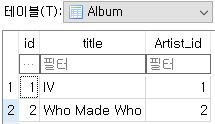

- FK 2번 필요 so select문 2번 사용. 아티스트부터 따라가는 정확한 연결 위해서는 select문 더 필요.

In [21]:
cur.executemany('INSERT INTO Genre(title) VALUES(?)', [('Rock',), ('Metal',)])

In [22]:
#곡 정보 자동으로 넣기
data = [
    ('Black Dog', 5, 297, 0, 'Who Made Who', 'Rock'),
    ('Stairway', 5, 297, 0, 'Who Made Who', 'Rock'),
    ('About to Rock', 5, 297, 0, 'IV', 'Metal'),
    ('Who Made Who', 5, 297, 0, 'IV', 'Metal'),
]

cur.executemany('''
    INSERT INTO Track VALUES(NULL, ?, ?, ?, ?, (
        SELECT id FROM Album WHERE title=? LIMIT 0, 1
    ), (
        SELECT id FROM Genre WHERE title=? LIMIT 0, 1
    ))
''', data)

- 스크립트 여러 번 실행하는데 id 없으면 문제 발생 가능. 이 경우 if문 써도 됨. T라고 하면, T가 0보다 크면 T 쓰고, 아니면 뭘 쓰고, 이런 식 가능. 이런 안전장치 없다고 가정.

In [23]:
conn.commit()

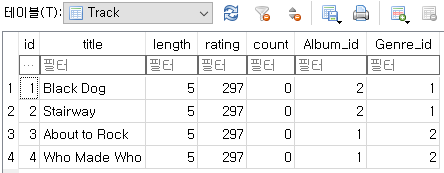

- select문을 쓰니까 id 안 빼도 등록 가능. 각 가수당 앨범이 하나 뿐이면 구문 바꾸면 가수 이름 넣고 PK값을 FK로 넘어가게 할 수 있음.
- execute, script, many, lastrowid, commit 전 로컬 file disk 미적용, commit 습관 등 봤음.
- 데이터가 준비되었으니 이제 select, join해서 가져오면 됨.
- 이 DB를 다른 방식으로 또 이용할 것.

- 우선 join 안 하면 벌어지는 일 확인.

In [24]:
cur.execute('SELECT * FROM Artist, Album')
cur.fetchall()

[(1, 'Led Zepplin', 1, 'IV', 1),
 (1, 'Led Zepplin', 2, 'Who Made Who', 2),
 (2, 'AC/DC', 1, 'IV', 1),
 (2, 'AC/DC', 2, 'Who Made Who', 2)]

- cross join 됨. 한 앨범 당 한 가수 나와야 하는데 모든 combination을 만듬.
- 흔히 쓰는 방법: 거기에 where 쓰기.
- artist id = album의 artist id

In [25]:
cur.execute('''SELECT * FROM Artist, Album
            WHERE Artist.id=Album.Artist_id''')
cur.fetchall()

[(1, 'Led Zepplin', 1, 'IV', 1), (2, 'AC/DC', 2, 'Who Made Who', 2)]

- 위 경우는 콤비네이션으로 메모리 다 쓴 후 필터링하는 것. 대신 join 쓰자.
- 가져올 건 앨범. 앨범을 기준으로. 그러면 inner join artist on...
- 키값 맞는 애들끼리. 결과 같아보이지만 다름.

In [27]:
cur.execute('''SELECT * FROM Album
            INNER JOIN Artist
            ON Artist.id=Album.Artist_id''')
cur.fetchall()

[(1, 'IV', 1, 1, 'Led Zepplin'), (2, 'Who Made Who', 2, 2, 'AC/DC')]

- 더 섞기. 알고 싶은 것 = Track. + 별칭 지어주기

In [29]:
cur.execute('''SELECT * FROM Track as A
            INNER JOIN Album as B
            ON A.Album_id=B.id''')
cur.fetchall()

[(1, 'Black Dog', 5, 297, 0, 2, 1, 2, 'Who Made Who', 2),
 (2, 'Stairway', 5, 297, 0, 2, 1, 2, 'Who Made Who', 2),
 (3, 'About to Rock', 5, 297, 0, 1, 2, 1, 'IV', 1),
 (4, 'Who Made Who', 5, 297, 0, 1, 2, 1, 'IV', 1)]

In [30]:
cur.execute('''SELECT A.title, B.title
            FROM Track as A
            INNER JOIN Album as B
            ON A.Album_id=B.id''')
cur.fetchall()

[('Black Dog', 'Who Made Who'),
 ('Stairway', 'Who Made Who'),
 ('About to Rock', 'IV'),
 ('Who Made Who', 'IV')]

In [31]:
cur.execute('''SELECT A.title, B.title, C.title
            FROM Track as A
            INNER JOIN Album AS B
            ON A.Album_id=B.id
            INNER JOIN Genre AS C
            ON A.Genre_id=C.id''')
cur.fetchall()

[('Black Dog', 'Who Made Who', 'Rock'),
 ('Stairway', 'Who Made Who', 'Rock'),
 ('About to Rock', 'IV', 'Metal'),
 ('Who Made Who', 'IV', 'Metal')]

In [32]:
cur.execute('''SELECT A.title, B.title, C.title
            FROM Track as A
            INNER JOIN Album AS B
            ON A.Album_id=B.id
            INNER JOIN Genre AS C
            ON A.Genre_id=C.id
            WHERE C.title LIKE '%Rock%'
            ''')
cur.fetchall()

[('Black Dog', 'Who Made Who', 'Rock'), ('Stairway', 'Who Made Who', 'Rock')]

- 앨범, 트랙을 묶어서 락 장르만 가져온 경우.

In [34]:
#아티스트 정보도 섞기
cur.execute('''SELECT A.title, B.title, C.title, D.title
            FROM Track as A
            INNER JOIN Album AS B
            ON A.Album_id=B.id
            INNER JOIN Genre AS C
            ON A.Genre_id=C.id
            INNER JOIN Artist AS D
            on B.Artist_id = D.id
            ''')
cur.fetchall()

[('Black Dog', 'Who Made Who', 'Rock', 'AC/DC'),
 ('Stairway', 'Who Made Who', 'Rock', 'AC/DC'),
 ('About to Rock', 'IV', 'Metal', 'Led Zepplin'),
 ('Who Made Who', 'IV', 'Metal', 'Led Zepplin')]

- inner join으로 4 테이블 다 섞었음.
- 입력 순서대로 하고 싶다면?

In [35]:
cur.execute('''SELECT A.title, B.title, C.title, D.title
            FROM Track as A
            INNER JOIN Album AS B
            ON A.Album_id=B.id
            INNER JOIN Genre AS C
            ON A.Genre_id=C.id
            INNER JOIN Artist AS D
            on B.Artist_id = D.id
            ORDER BY D.title ASC
            ''')
cur.fetchall() #가수 ABC순

[('Black Dog', 'Who Made Who', 'Rock', 'AC/DC'),
 ('Stairway', 'Who Made Who', 'Rock', 'AC/DC'),
 ('About to Rock', 'IV', 'Metal', 'Led Zepplin'),
 ('Who Made Who', 'IV', 'Metal', 'Led Zepplin')]

In [36]:
cur.execute('''SELECT A.title, B.title, C.title, D.title
            FROM Track as A
            INNER JOIN Album AS B
            ON A.Album_id=B.id
            INNER JOIN Genre AS C
            ON A.Genre_id=C.id
            INNER JOIN Artist AS D
            on B.Artist_id = D.id
            ORDER BY D.id ASC
            ''')
cur.fetchall() #가수 입력순

[('About to Rock', 'IV', 'Metal', 'Led Zepplin'),
 ('Who Made Who', 'IV', 'Metal', 'Led Zepplin'),
 ('Black Dog', 'Who Made Who', 'Rock', 'AC/DC'),
 ('Stairway', 'Who Made Who', 'Rock', 'AC/DC')]

- 다른 연산자 각자 써보기. 5분~10분 사이 곡, 발행 연도... between.
- DB는 RDBMS 사용.

- 실제 우리 눈에 보이는 Playlist는 데이터가 조각난 형태를 join으로 가져올 수 있음. 되도록 개발할 떄 이런 식으로 하는 게 좋음.

- ORM
    - 관계형 DB와 object(객체)를 mapping. DBMS는 아님. DB와 무관. 단지 쓰기 편하게 바꿔줌. 프로그래밍 테크닉. 대신 해주는 애들을 총칭해서 ORM이라고 부름. 특히 파이썬에서 SQLAlchemy 많이 사용.
    - 실제 RDB에 있는 ERD와 object로서 객체지향으로 보는 걸 매핑해줌.
    - 매핑 필요 이유는?
    - 해주는 역할: ERD와 실제 개발 괴리 큼. 실제 개발 시 온전히 테이블만 쓰지 않음. so 시간 많이 쏟는 곳: 쿼리 간단함에도 여러 줄 됨. SQL문 고치고 수정하는 과정에서 오류 다발.
    - 이와 같은 미스매치 줄이기 위해 사용.
    - 자동으로 매핑해주나, 비즈니스 모델에 맞춤.
    - 단점: 오버헤드 들어감. DB, 프로그램 따로 만들고 매핑까지 시켜야 하니. 대신 객체지향 개발자에게 편함.
- 비즈니스 관점에서 비즈니스 모델만 생각할 수 있다는 것은?
    - 게시판을 하나 만들 거고, 거기서 동작해야 하는 동작에 대한 기능 요구사항. user라고 할 수 있는 건 사용자가 하나 있고, 사용자가 하는 액션으로는 질문 가능. 그리고 질문에는 답변 가능. tag도 달 수 있음. 질문시. 그 태그가 자연어가 아니라 미리 정해진 pool에서만 가져가야 함. 요구사항 디테일한 게시판.
    - 게시판에 질문 남길 때마다 작성자, 사용자가 질문하면서 태그를 달 것. 그 태그가 사용될 떄마다 +1, 태그 빠질 때마다 -1 되어야 함.
    - 실제 만든다고 가정하면 이런 식으로 그리기도. 사용자는 질문을 달 수 있고, 질문에 답변 가능하고, 질문에 태깅 가능하고. 사용자는 질문을 안 할 수도 있고 여럿 할 수도 있으니 1:n의 관계. 질문과 답변도 1:n, 사용자와 답변도 1:n, 질문과 태그는 n:n. 이런 식으로 테이블 설계.
    - 이렇게 테이블 설계함. 밑줄은 PK, 앞의 그림별로 테이블 만들어짐. 이 상태에서...
    - 질문해보자. 코드 만들어줘야 함. ex) 내가 데이터를 수집했는데, 데이터의 중요한 키워드가 있다면 카운팅해줌. 그 떄 실제 코드를 어떻게 짜야 하나?
    - 질문 등록해야. question에, 특정 사용자가. then 질문을 등록했고, 앞의 그림에서 보면 질문과 태그 사이 연관관계 존재. 태그의 삽입 위치 등 정보 알고 있어야.
    - 파이썬, RDB. 2개의 태그가 태그 풀에 있는지 찾아야 하고, 다행히 PK를 찾고 나서는 둘 다 등록되어 있음.
    - so question tag에 1번 질문에서 1번 태그 사용, 2번 태그 2번 질문... 기록. 실컷 블로그에 글을 쓰고 태그란에 2개 태그 집어넣은 상태. 뒷단에서 ajax든 자동 처리 루틴이든 찾았을 것. 그 다음 태그 사용 시마다 +1 또는 -1 해주라고 했음. then id값 이용해도 되고, name 이용해도 되고. 키워드 해당되는 애를 count +1 하도록 업데이트 해줌. 여기까지 해야 질문이 끝남.
    - 질문이라는 액션 하나에 이만큼의 쿼리가 필요. 실제 개발 시 다이어그램과 맞지도 않고, 작업해야 하는 부가사항이 너무 많음. 특히 SQL 잘 모르면 고생.
    - 이건 단순. 없던 질문 추가니까. 문제는 기존 질문 추가.
    - 질문 수정 -> 새로 추가된 건 +1, 사라졌으면 태그 -1 해줘야. 기존에 없던 ORM. Alchemy는 삭제됨. 수정. 서비스 개발보다 쿼리 처리에 더 많은 힘을 쏟아야 함 -> 사용자 서비스 이용 관점, 비즈니스 모델 관점에서는 상관 없는 일을 하고 있는 것. 문제 수행에 있어서.
    - 괴리 너무 큼 -> 이런 형태 바꿔야 = ORM의 목표.
- 접근 방법: 객체 형태로 접근.
    - 질문 객체와 tag 객체 존재. 여기에 private 변수로 속성에 대한 정의 -> 객체 속성만 건드려주면 복잡한 쿼리 사용 없이 간편히 해결 가능 = ORM.
    - 특히 ORM은 객체지향 지원하니 간편히 사용 가능; 이런 형태를 저런 형태로 바꿔서, 연동해서 객체로 해보자, 그게 ORM을 쓰는 이유.
    - 이유는 충분히 이해 될 것.
    - ORM을 해주는 것 많은데 SQLalchemy 쓰는 이유: 여러 DB 지원. SQLite, MySQL... 다 지원. 웹서비스도 django, plask 지원. 즉 여러 군데에서 사용 가능. flask에 연동 가능한 DB 선택하고, 정 안 되면 SQLite 쓰고, 중간에 객체 통해 접근하고 싶으면 SQLalchemy로 연동만 시켜주면 객체 조작으로 SQL문 몰라도 접근 가능.

- SQLAlchemy 쓸 것. 장점처럼 잘 정리됨. DB를 위한 프로그래밍... 파이썬에서 많이 쓰이고... 특히 다양한 DB 지원이 장점. 다양한 DB 지원 -> 특성에 따라 지원하는 SQL문이나 connection이 다른 여러 DBMS 통합 관리 가능. 통합 관리해서 덩치 조금 클 것.
- 아키텍처. 밑의 DBAPI, 각 DB마다 서로 다른 API. API 각자 연결하는 애 있을 거고, connection pooling은 커넥션 관리. dialect는 실제 연결. dialect로 DB에 접근.
    - 엔진: 얘들이 표현하는 SQL을 객체로 접근할 거니까, 객체에 수정 발생 시 대신 처리. ORM이 윗단에 있고, 코어단이 되면 ORM으로 넘어갈 것. 2-step으로.
- 엔진. 얘가 starting point. 밑에 있는 dialect, pool이 background단. 우리는 엔진을 통해 접근, 커넥션 설정, 알아서 설정한 DB에 가서 커넥션 만들도 커서 객체 들고 있을 것.
    - dialect: SQL문 안 써도 해석해주는 부분.
- 이렇게 동작.

In [37]:
#설치하기
import sqlalchemy
sqlalchemy.__version__

'1.3.13'

- sql 알케미: SQL문으로 자동 변환 후 DB 접근. lazy connecting. 내 작업 바로 반영 안 됨. 접속하고 왔다갔다하고 끝날 것.
- 나중에는 객체, DB 싱크 안 맞을 수 있음.
- create 엔진부터. 우선 DB 접근 방식. 저렇게 접근하는데, 우린 SQLite 쓰니까 드라이버 없고, 유저네임, PW 없고, port번호, host... 다 없음. ///. 그리고 나서 file 이름 써주면 됨.
- echo: 중간과정 봐야 함. 개발 과정이니까. so True.

In [39]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///:memory:", echo = True)

- 객체로 접근. table 객체 존재. column도 객체 존재. 얘들이 어디 들어있냐? metadata 전체에. 테이블 관련 기존 테이블 컬럼, 옵션, or, and... 다 저기 있음. 메타 데이터에서 상속받아 만들 것.
- sqlalchemy에서 보면 table, column, meta data, FK... 다 가져옴.
- metadata를 하나 만들고, 상속받아서 table 객체 만들 것. 저렇게 써있는 걸 보니 아마 테이블 이름, bind 필요할 것. 그리고 그 뒤에 argument value로 필요한 컬럼, 컬럼 객체, 컬럼명, 데이터 타입, PK, FK... 특정 DBMS가 FK를 지원하니 저런 게 존재하는 듯. 이렇게 하면 2개의 테이블, Users와 Address 생김. 객체 상으로. DB가 아님.
- 두 테이블 연결 by PK, FK: metadata로 다 만들어놓고 할 것.
- 이 때도 메모리 상에만 있음. DB 미접근. lazy connecting.
- 만들어보자.

In [40]:
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey

In [41]:
meta = MetaData()

users = Table('users', meta,
             Column('id', Integer, primary_key=True),
             Column('name', String),
             Column('fullname', String),
)

addr = Table('address', meta,
                 Column('id', Integer, primary_key=True),
                 Column('user_id', None, ForeignKey('users.id')),
                 Column('email_address', String, nullable=False)
) #null 허용

테이블 아니고 객체만 생성한 것.

In [42]:
users

Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), schema=None)

이렇게.

In [43]:
meta.create_all(engine) #엔진에 생성

2020-07-14 15:40:23,931 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


2020-07-14 15:40:23,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,938 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


2020-07-14 15:40:23,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,941 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("users")


INFO:sqlalchemy.engine.base.Engine:PRAGMA main.table_info("users")


2020-07-14 15:40:23,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,944 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("users")


INFO:sqlalchemy.engine.base.Engine:PRAGMA temp.table_info("users")


2020-07-14 15:40:23,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,947 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("address")


INFO:sqlalchemy.engine.base.Engine:PRAGMA main.table_info("address")


2020-07-14 15:40:23,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,949 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("address")


INFO:sqlalchemy.engine.base.Engine:PRAGMA temp.table_info("address")


2020-07-14 15:40:23,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,953 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	PRIMARY KEY (id)
)




INFO:sqlalchemy.engine.base.Engine:
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	PRIMARY KEY (id)
)




2020-07-14 15:40:23,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,957 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2020-07-14 15:40:23,959 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE address (
	id INTEGER NOT NULL, 
	user_id INTEGER, 
	email_address VARCHAR NOT NULL, 
	PRIMARY KEY (id), 
	FOREIGN KEY(user_id) REFERENCES users (id)
)




INFO:sqlalchemy.engine.base.Engine:
CREATE TABLE address (
	id INTEGER NOT NULL, 
	user_id INTEGER, 
	email_address VARCHAR NOT NULL, 
	PRIMARY KEY (id), 
	FOREIGN KEY(user_id) REFERENCES users (id)
)




2020-07-14 15:40:23,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2020-07-14 15:40:23,962 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


- 뭐 하는지 에코로 쭉 표현됨. 보자.
- 친숙한 SQL문들이 나옴. 변환해주는 것. 엔진을 생성했으므로.
- meta에 테이블 2개 만들었음.

In [44]:
meta.tables

immutabledict({'users': Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), schema=None), 'address': Table('address', MetaData(bind=None), Column('id', Integer(), table=<address>, primary_key=True, nullable=False), Column('user_id', Integer(), ForeignKey('users.id'), table=<address>), Column('email_address', String(), table=<address>, nullable=False), schema=None)})

users, adress.

In [45]:
meta.bind

- meta 상속받은 테이블이 줄 수 있는 것: 바인딩 정보 보기, 예제... 등을 보면 이렇게 됨.

In [46]:
users.insert()

insert object. 아까 본 named style로 쿼리문이 만들어져 있음.

In [47]:
print(users.insert())

INSERT INTO users (id, name, fullname) VALUES (:id, :name, :fullname)


쿼리 만들 떄 value에, id, name, fullname이니까... 쿼리가 이렇게 나옴.

In [56]:
insert = users.insert().values(name='test', fullname='testtest')
print(insert)
print(insert.compile())
print(insert.compile().params)

INSERT INTO users (name, fullname) VALUES (:name, :fullname)
INSERT INTO users (name, fullname) VALUES (:name, :fullname)
{'name': 'test', 'fullname': 'testtest'}


- 바인딩 안 되었기에 아직 insert 안 됨.
- 커넥션 개체를 불러와보자. 엔진 생성 시 접근할 DB 정보를 줬으니. 커넥션이 누군가를 가리키고 있을 거고, 똑같이 execute 있을 것. 여기에 object를 넣을 것.

In [51]:
conn = engine.connect()

In [55]:
conn.execute(insert)

2020-07-14 15:47:02,842 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname) VALUES (?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO users (name, fullname) VALUES (?, ?)


2020-07-14 15:47:02,844 INFO sqlalchemy.engine.base.Engine ('test', 'testtest')


INFO:sqlalchemy.engine.base.Engine:('test', 'testtest')


2020-07-14 15:47:02,848 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


파라미터를 투입하였기에 무언가가 쿼리로 변환되어 SQL로 들어감.

In [58]:
print(users.select().compile()) #users의 select 형태.

SELECT users.id, users.name, users.fullname 
FROM users


In [59]:
conn.execute(users.select())

2020-07-14 15:48:40,561 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users


INFO:sqlalchemy.engine.base.Engine:SELECT users.id, users.name, users.fullname 
FROM users


2020-07-14 15:48:40,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


쿼리 바뀌고, 무언가 처리됨. 객체의 함수를 통해 변환.

임시로 커서를 하나 받아서, ppt 보면 result가 있음.

In [61]:
cur = conn.execute(users.select())

2020-07-14 15:50:02,713 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users


INFO:sqlalchemy.engine.base.Engine:SELECT users.id, users.name, users.fullname 
FROM users


2020-07-14 15:50:02,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [62]:
list(cur)

[(1, 'test', 'testtest')]

데이터 확인.

아까 입력 안 한 것: PK. 입력한 적 없으니 값 없어야 함. lazy connecting하며 DB에 다녀오니 id값이 생성됨.

In [67]:
#주어진 파라미터로 insert
cur = conn.execute(users.insert(), {'name':'test2', 'fullname':'test2test2'})

2020-07-14 15:53:18,453 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname) VALUES (?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO users (name, fullname) VALUES (?, ?)


2020-07-14 15:53:18,455 INFO sqlalchemy.engine.base.Engine ('test2', 'test2test2')


INFO:sqlalchemy.engine.base.Engine:('test2', 'test2test2')


2020-07-14 15:53:18,459 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [68]:
cur.lastrowid

4

connection 객체를 통해 그대로 넣어줄 수 있음. dialect가 해석하고, connection pool로 커넥션한 후 DB API로 실제 DB에 내려보낸 과정.

In [73]:
cur = conn.execute(users.select())
print(cur)

2020-07-14 15:55:58,622 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users


INFO:sqlalchemy.engine.base.Engine:SELECT users.id, users.name, users.fullname 
FROM users


2020-07-14 15:55:58,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [75]:
from sqlalchemy import select
print(select([users.c.name, users.c.fullname]))
cur = conn.execute(select([users.c.name, users.c.fullname]))
print(list(cur))

SELECT users.name, users.fullname 
FROM users
2020-07-14 15:57:39,906 INFO sqlalchemy.engine.base.Engine SELECT users.name, users.fullname 
FROM users


INFO:sqlalchemy.engine.base.Engine:SELECT users.name, users.fullname 
FROM users


2020-07-14 15:57:39,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


[('test', 'testtest'), ('test2', 'test2test2'), ('test2', 'test2test2'), ('test2', 'test2test2')]


- select문에 앞에서 만든 column의 name, parameter를 넣어서 실행, 결과 가져오기. 이렇게도 사용 가능.
- ORM 단으로 올라가면 더 객체형이 됨.
- c는 coloumn이라는 뜻.
- binding시키면 users.column...으로 가져와야 하는데 잘 안 되어서 일단 select문으로 바로 썼음.

where절 조건.

In [77]:
print(users.c.id == 1) #일반적 문법
print((users.c.id == 1).compile().params)

users.id = :id_1
{'id_1': 1}


이 둘을 이용해서 select에 users를 넣을 것.

In [78]:
cur = conn.execute(users.select().where(users.c.id == 1))
list(cur)

2020-07-14 16:00:55,406 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users 
WHERE users.id = ?


INFO:sqlalchemy.engine.base.Engine:SELECT users.id, users.name, users.fullname 
FROM users 
WHERE users.id = ?


2020-07-14 16:00:55,408 INFO sqlalchemy.engine.base.Engine (1,)


INFO:sqlalchemy.engine.base.Engine:(1,)


[(1, 'test', 'testtest')]

이런 식으로 SQL문을 객체 내 변수 비교처럼 사용 가능.

아무리 커넥션 정보를 줘도 안 움직임. 실제 실행할 때만 하니까 lazy connecting.

In [80]:
addr

Table('address', MetaData(bind=None), Column('id', Integer(), table=<address>, primary_key=True, nullable=False), Column('user_id', Integer(), ForeignKey('users.id'), table=<address>), Column('email_address', String(), table=<address>, nullable=False), schema=None)

In [101]:
#데이터가 없으니 insert하자
cur = conn.execute(addr.insert(), {'user_id': 1, 'email_address':'1@1.com'})

2020-07-14 16:11:10,236 INFO sqlalchemy.engine.base.Engine INSERT INTO address (user_id, email_address) VALUES (?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO address (user_id, email_address) VALUES (?, ?)


2020-07-14 16:11:10,238 INFO sqlalchemy.engine.base.Engine (1, '1@1.com')


INFO:sqlalchemy.engine.base.Engine:(1, '1@1.com')


2020-07-14 16:11:10,240 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [102]:
cur.lastrowid #실제 DB에 다녀왔으면 1이 나와야.

3

In [103]:
# join 연산
from sqlalchemy import join

In [104]:
users.join(addr)

<sqlalchemy.sql.selectable.Join at 0x1ca77451048; Join object on users(1969084432648) and address(1969084435080)>

In [105]:
print(users.join(addr))

users JOIN address ON users.id = address.user_id


In [106]:
print(select().select_from(users.join(addr)))

SELECT  
FROM users JOIN address ON users.id = address.user_id


In [107]:
#inner join문 작성
print(select([users.c.name, users.c.fullname, addr.c.email_address]).select_from(users.join(addr)))

SELECT users.name, users.fullname, address.email_address 
FROM users JOIN address ON users.id = address.user_id


In [108]:
cur = conn.execute(select([users.c.name, users.c.fullname, addr.c.email_address]).select_from(users.join(addr)))
cur.fetchall()

2020-07-14 16:11:13,091 INFO sqlalchemy.engine.base.Engine SELECT users.name, users.fullname, address.email_address 
FROM users JOIN address ON users.id = address.user_id


INFO:sqlalchemy.engine.base.Engine:SELECT users.name, users.fullname, address.email_address 
FROM users JOIN address ON users.id = address.user_id


2020-07-14 16:11:13,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


[('test', 'testtest', '1@1.com')]

In [4]:
#lazy니까 아직 안 생김
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, ForeignKey, select, join
engine = create_engine('sqlite:///ex3.db', echo=True) #Echo True 켜야 과정이 보임
engine

Engine(sqlite:///ex3.db)

In [5]:
meta = MetaData()

In [6]:
users = Table('user', meta,
             Column('id', Integer, primary_key=True),
             Column('name', String, nullable=False))
addr = Table('address', meta,
            Column('id', Integer, primary_key=True),
            Column('user_id', Integer, ForeignKey('user.id')),
            Column('email', String))

In [7]:
meta.create_all(engine)

2020-07-14 16:16:33,418 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-07-14 16:16:33,423 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,425 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-07-14 16:16:33,426 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,428 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("user")
2020-07-14 16:16:33,428 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,430 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("user")
2020-07-14 16:16:33,431 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,431 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("address")
2020-07-14 16:16:33,432 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,433 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("address")
2020-07-14 16:16:33,434 INFO sqlalchemy.engine.base.Engine ()
2020-07-14 16:16:33,435 

- 실제 DB 생성 타임 확인용.

In [8]:
#엔진을 이용, 데이터를 생성해보자.
engine.execute(users.insert(), [{'name':1}, {'name':2}])

2020-07-14 16:18:00,610 INFO sqlalchemy.engine.base.Engine INSERT INTO user (name) VALUES (?)
2020-07-14 16:18:00,611 INFO sqlalchemy.engine.base.Engine ((1,), (2,))
2020-07-14 16:18:00,615 INFO sqlalchemy.engine.base.Engine COMMIT


commit이 있음 -> 반영되었을까? yes  
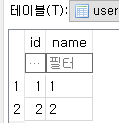

In [9]:
engine.execute(addr.insert(), [{'user_id':1, 'email': '1@1.com'}, {'user_id':2, 'email': '2'}])

2020-07-14 16:19:16,480 INFO sqlalchemy.engine.base.Engine INSERT INTO address (user_id, email) VALUES (?, ?)
2020-07-14 16:19:16,482 INFO sqlalchemy.engine.base.Engine ((1, '1@1.com'), (2, '2'))
2020-07-14 16:19:16,489 INFO sqlalchemy.engine.base.Engine COMMIT


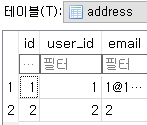

In [11]:
cur = engine.execute(select([users.c.name, addr.c.email]).select_from(users.join(addr)))
cur.fetchall()

2020-07-14 16:20:16,625 INFO sqlalchemy.engine.base.Engine SELECT user.name, address.email 
FROM user JOIN address ON user.id = address.user_id
2020-07-14 16:20:16,627 INFO sqlalchemy.engine.base.Engine ()


[('1', '1@1.com'), ('2', '2')]

cur 생성은 cur를 받아서 할 거냐 connection에서 임시 커서 쓸 거냐의 차이. 사용 차이는 없음. 객체를 받아 쓸 지 임시로 받은 걸 쓰고 말 건지 그 차이.

- 여기까지 했으면 아까 쿼리 입력했던 걸 이 걸로 바꿀 수 있음. 테이블만 몇 개 생성, FK만 지정해주면.
- 물론 select로 id값 가져오려면 좀 바꿔야 할 것. 쉽게 하려면 1234 static으로 받아넣으면 됨. 순서 아니까. 일단 박아놓고, 앨범명이 아니라 앨범 id로 바뀔 것. 그러면 insert문으로 그대로 입력 가능.
- 그러면 만들어지는 것: 위에 SQL문에서 실컷 만든 DB.
- 사용법 다름. 객체 이용이므로. 비슷해보일 수 있으나 다름.
- 거기까지 해오세요. cuz 동일 예제. 밑에 코드 다 있음. 한 번씩 돌려보고 오기. 그러면 내일 150p 진행.
- 지금 한 건 core단. 151p까지 돌려보고 오기. 꼭. 그래야 ORM 진행 가능.
    - 그대로 따라해도 되고, 코드 바꿔도 됨.
- ORM은 진짜 객체로 진행. 지저분한 과정 없음.
- 잘 안 되었던 사람들은 질문하고, 다 된 경우 조별모임.